**UNIVERSIDADE DO ESTADO DO RIO DE JANEIRO**

**INSTITUTO DE MATEMÁTICA E ESTATÍSTICA - IME**

**COMPUTAÇÃO GRÁFICA (IME 04-10842)**

**DESCRIÇÃO:** Prática de Geometria

In [2]:
import numpy as np # operações matemáticas e matriciais
from matplotlib import pyplot as plt # visualização dos gráficos e animações

#**Exercício 1**
Aplique uma rotação sobre um ponto arbitrário.

Apresente o ponto original e o tranformado numa figura.

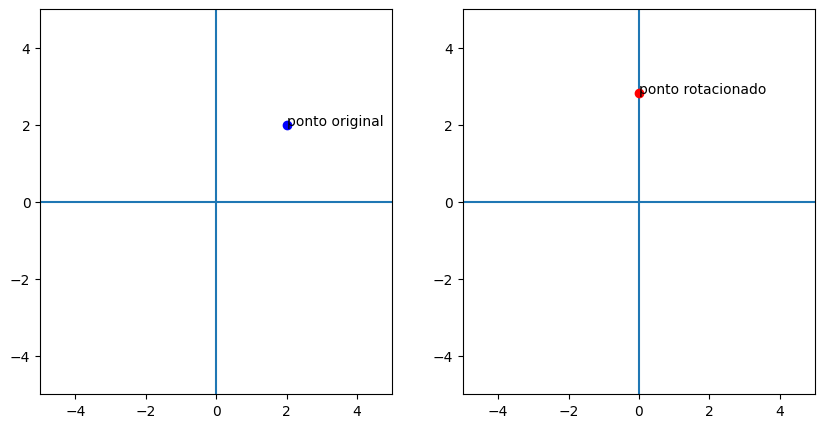

In [3]:
#coordenadas originais do ponto
po = np.array([[2,2]])
po = np.transpose(po)

#plotando o ponto original
intervalo = (-5,5)
plt.figure(figsize=(10,5)) #cria uma figura com 10x5 polegadas
plt.subplot(1,2,1) #cria um grid 1x2 e seleciona a primeira célula
plt.xlim(intervalo), plt.ylim(intervalo) #define os limites do gráfico
plt.axhline(), plt.axvline() #desenha os eixos
plt.plot(po[0,0], po[1,0], 'bo') #plota o ponto original em um circulo vermelho
plt.text(po[0,0], po[1,0], 'ponto original')

#rotacionando o ponto
R = np.array([
    [np.cos(45/180*np.pi), -np.sin(45/180*np.pi)], #matriz de rotação 45 graus no sentido anti-horário
    [np.sin(45/180*np.pi), np.cos(45/180*np.pi)]
])
pr = np.dot(R, po) #rotaciona o ponto original

#plotando o ponto rotacionado
plt.subplot(1,2,2) #seleciona a segunda célula do grid
plt.xlim(intervalo), plt.ylim(intervalo)
plt.axhline(), plt.axvline()
plt.plot(pr[0,0], pr[1,0], 'ro', data="pr")
plt.text(pr[0,0], pr[1,0], 'ponto rotacionado')
plt.show()


#**Exercício 2**
Crie uma animação em que um ponto é rotacionado em torno da origem.



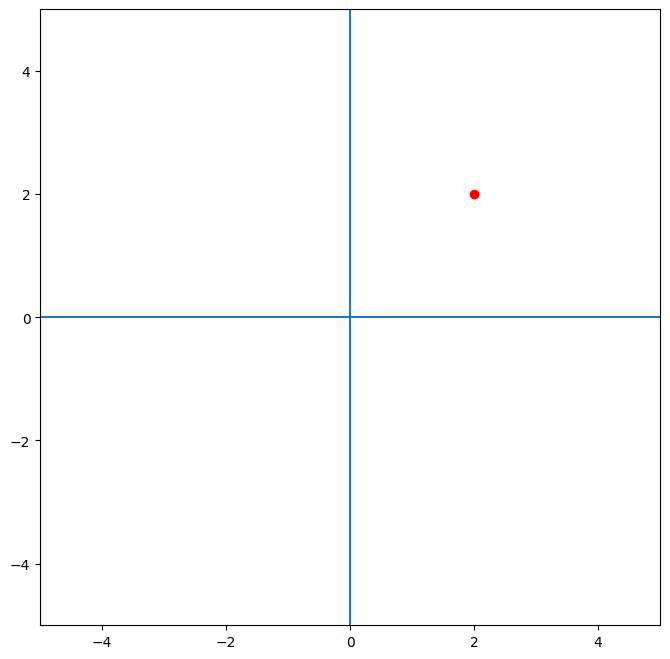

In [4]:
from matplotlib import animation
from matplotlib import rc

rc('animation', html='jshtml') #configura o matplotlib para exibir animações em HTML

#criando a figura
intervalo = (-5,5)
figsize = (8,8)
fig = plt.figure(figsize=figsize)
ax = plt.axes()

#funcao de animacao
def animate(i):
    global po, theta

    #transformando o ponto original
    theta_rad = theta/180*np.pi
    R = np.array([
        [np.cos(theta_rad), -np.sin(theta_rad)],
        [np.sin(theta_rad), np.cos(theta_rad)]
    ])
    pt = np.matmul(R, po)

    #plotando os pontos transformados
    ax.clear()
    ax.set_xlim(intervalo), ax.set_ylim(intervalo)
    ax.axhline(), ax.axvline()
    ax.plot(pt[0,0], pt[1,0], 'ro')

    #incrementando o theta
    theta += 12

#ponto original
po = np.array([[2,2]])
po = np.transpose(po)
theta = 0

#define o objeto de animação
anim = animation.FuncAnimation(fig, animate, frames=100)


In [5]:
anim

#**Exercício 3**
Aplique uma tranformação linear sobre um conjunto de pontos conectados que formam um objeto (e.g., um quadrado).

Apresente o objeto antes e depois da transformação numa figura.

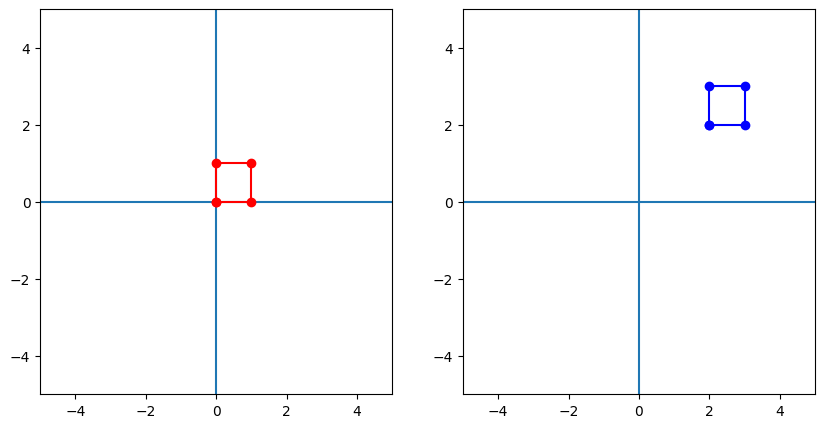

In [6]:
# criando a matriz de pontos originais
#adicionando 1 no final de cada vetor para coordenadas afim
quadrado_orig = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 1, 1],
    [1, 0, 1],   
])
quadrado_orig = np.transpose(quadrado_orig)

# separando as listas de coordenadas x e y dos pontos originais (para o plot)
x_list = np.append(quadrado_orig[0,:], quadrado_orig[0,0])
y_list = np.append(quadrado_orig[1,:], quadrado_orig[1,0])

# criando a figura e plotando os pontos originais
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.xlim((-5,5)), plt.ylim((-5,5))
plt.axhline(), plt.axvline()
plt.plot(x_list, y_list, "-ro")

# montando a matriz de transformação (translação) e transformando os pontos originais
tx = 2
ty = 2
mat_transl = np.array([
    [1, 0, tx],
    [0, 1, ty],
    [0, 0, 1]
])
quadrado_transl = np.matmul(mat_transl, quadrado_orig)

# separando as listas de coordenadas x e y dos pontos transformados (para o plot)
x_list_transl = np.append(quadrado_transl[0,:], quadrado_transl[0,0])
y_list_transl = np.append(quadrado_transl[1,:], quadrado_transl[1,0])

# plotando os pontos transformados
plt.subplot(1,2,2)
plt.xlim((-5,5)), plt.ylim((-5,5))
plt.axhline(), plt.axvline()
plt.plot(x_list_transl, y_list_transl, "-bo")

#mostrando o resultado
plt.show()

#**Exercício 4**
Aplique uma tranformação de forma que um conjunto de pontos conectados (e.g., um quadrado) é rotacionado em torno do seu centro.

Apresente o objeto antes e depois da transformação numa figura.

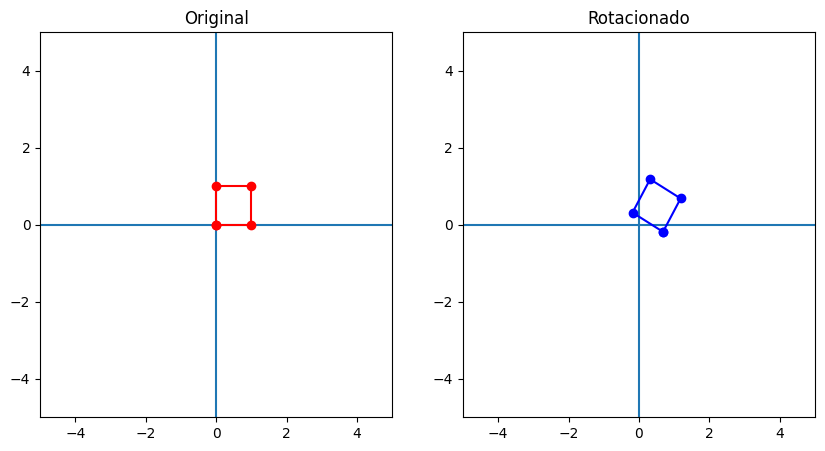

In [10]:
# criando a matriz de pontos originais
po = np.array([[0,0,1],[0,1,1],[1,1,1],[1,0,1]])
po = np.transpose(po)

# separando as listas de coordenadas x e y dos pontos originais (para o plot)
x_list = np.append(po[0,:], po[0,0])
y_list = np.append(po[1,:], po[1,0])

# criando a figura e plotando os pontos originais
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.xlim((-5,5)), plt.ylim((-5,5))
plt.axhline(), plt.axvline()
plt.title("Original")
plt.plot(x_list, y_list, "-ro")

# montando a matriz de transformação e transformando os pontos originais
To = np.array([[1, 0,-0.5],
               [0, 1,-0.5],
               [0, 0, 1  ]])
R = np.array([[np.cos(60/180*np.pi),-np.sin(60/180*np.pi), 0],
              [np.sin(60/180*np.pi), np.cos(60/180*np.pi), 0],
              [0,                    0,                    1]])
Tc = np.array([[1, 0, 0.5],
               [0, 1, 0.5],
               [0, 0, 1  ]])
T = np.matmul(R,To)
T = np.matmul(Tc,T)
pt = np.matmul(T, po)

# separando as listas de coordenadas x e y dos pontos transformados (para o plot)
x_list = np.append(pt[0,:], pt[0,0])
y_list = np.append(pt[1,:], pt[1,0])

# plotando os pontos transformados
plt.subplot(1,2,2)
plt.xlim((-5,5)), plt.ylim((-5,5))
plt.axhline(), plt.axvline()
plt.title("Rotacionado")
plt.plot(x_list, y_list, "-bo")


#**Exercício 5**
Crie uma animação em que um objeto é rotacionado em torno do seu centro.

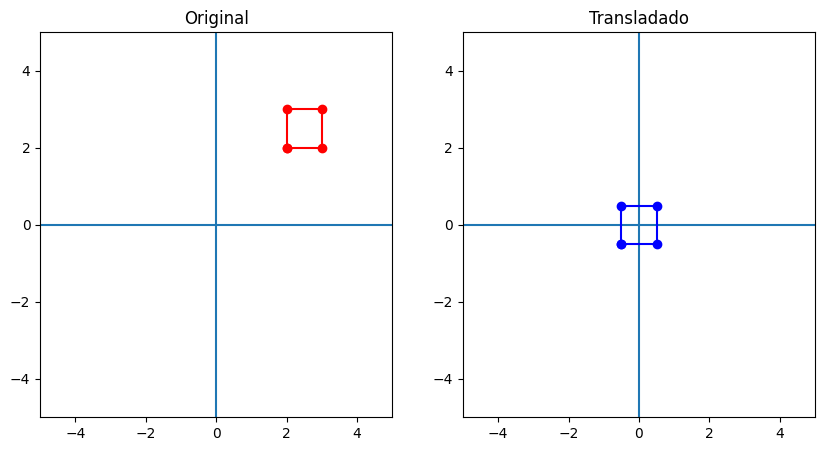

In [19]:
#teste para transladar um quadrado qualuqer para a origem
#objeto original
quadrado_orig = np.array([
    [2, 2, 1],
    [3, 2, 1],
    [3, 3, 1],
    [2, 3, 1],   
])
quadrado_orig = np.transpose(quadrado_orig)

centro_x = np.mean(quadrado_orig[0,:])
centro_y = np.mean(quadrado_orig[1,:])
        
transl_orig = np.array([
        [1, 0, -centro_x],
        [0, 1, -centro_y],
        [0, 0, 1]
])

#quadrado transladado
quadrado_transl = np.matmul(transl_orig, quadrado_orig)

#separando as listas de coordenadas x e y dos pontos originais (para o plot)
# separando as listas de coordenadas x e y dos pontos originais (para o plot)
x_list_orig = np.append(quadrado_orig[0,:], quadrado_orig[0,0])
y_list_orig = np.append(quadrado_orig[1,:], quadrado_orig[1,0])

x_list_transl = np.append(quadrado_transl[0,:], quadrado_transl[0,0])
y_list_transl = np.append(quadrado_transl[1,:], quadrado_transl[1,0])

# criando a figura e plotando os pontos originais
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.xlim((-5,5)), plt.ylim((-5,5))
plt.axhline(), plt.axvline()
plt.title("Original")
plt.plot(x_list_orig, y_list_orig, "-ro")

# separando as listas de coordenadas x e y dos pontos transformados (para o plot)
plt.subplot(1,2,2)
plt.xlim((-5,5)), plt.ylim((-5,5))
plt.axhline(), plt.axvline()
plt.title("Transladado")
plt.plot(x_list_transl, y_list_transl, "-bo")
plt.show()

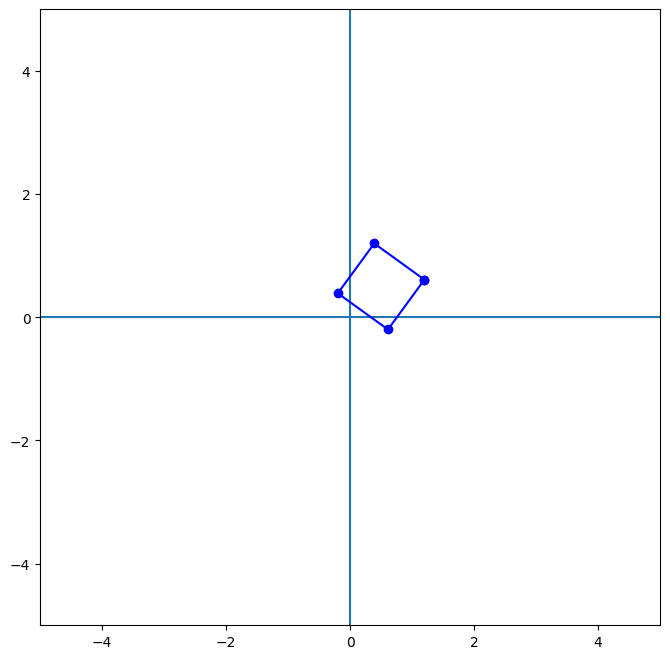

In [20]:
from matplotlib import animation # funções de animação
from matplotlib import rc # para a definição de parâmetros de runtime configuration (rcParams)

# configurando rcParams
rc('animation', html='jshtml')

# criando a figura
intervalo = (-5,5)
figsize = (8,8)
fig = plt.figure(figsize=figsize)
ax = plt.axes()

# função de animação (executada a cada frame)
def animate(i):
    global theta, po

    # transformando o ponto original
    
    #transladando para a origem
    centro_x = np.mean(quadrado_orig[0,:])
    centro_y = np.mean(quadrado_orig[1,:])
        
    transl_orig = np.array([
        [1, 0, -centro_x],
        [0, 1, -centro_y],
        [0, 0, 1]
    ])
    
    #rotacionando
    rot = np.array([
        [np.cos(theta/180*np.pi), -np.sin(theta/180*np.pi), 0],
        [np.sin(theta/180*np.pi), np.cos(theta/180*np.pi), 0],
        [0, 0, 1]
    ])
    
    #transladando de volta
    destransl = np.array([
        [1, 0, centro_x],
        [0, 1, centro_y],
        [0, 0, 1]
    ])
    #matriz de transformação final
    mat_rot = np.matmul(destransl, np.matmul(rot, transl_orig))
    quadrado_rot = np.matmul(mat_rot, quadrado_orig)

    # separando as listas de coordenadas x e y dos pontos transformados (para o plot)
    x_lim_orig = np.append(quadrado_orig[0,:], quadrado_orig[0,0])
    y_lim_orig = np.append(quadrado_orig[1,:], quadrado_orig[1,0])
    x_lim_rot = np.append(quadrado_rot[0,:], quadrado_rot[0,0])
    y_lim_rot = np.append(quadrado_rot[1,:], quadrado_rot[1,0])
    
    # plotando os pontos transformados
    ax.clear()
    ax.set_xlim(intervalo), ax.set_ylim(intervalo)
    ax.axhline(), ax.axvline()
    ax.plot(x_lim_rot, y_lim_rot, "-bo")

    #incrementando o theta
    theta += 12

# objeto original
quadrado_orig = np.array([
    [0, 0, 1],
    [0, 1, 1],
    [1, 1, 1],
    [1, 0, 1],   
])
quadrado_orig = np.transpose(quadrado_orig)

# define objeto animação
anim = animation.FuncAnimation(fig, animate, frames=100)

In [21]:
# cria a animação
anim